In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_preprocess_interpolation.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

In [2]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
# Applying MinMax scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

scaled_experiment_data = scaled_data[0:118]

scaled_features = scaled_experiment_data[['Temperature', 'pCH4_per_pO2', 'Contact time']]

c:\Users\OJH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OJH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OJH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OJH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

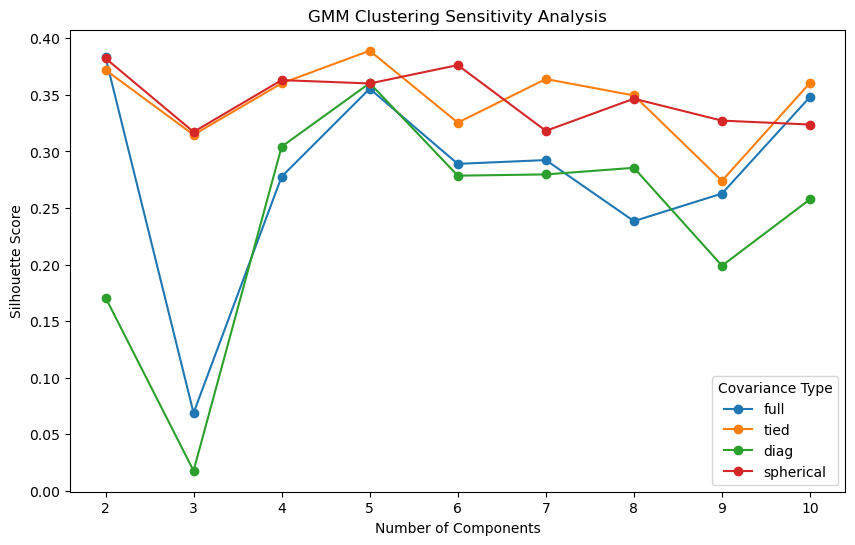

Best configuration: n_components              5
covariance_type        tied
silhouette_score    0.38901
Name: 13, dtype: object


In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scaled_features' is already defined and scaled

# Define the range of clusters to test
n_components_range = range(2, 11)  # Example: Testing 2 to 10 clusters

# Define the covariance types to test
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Initialize lists to store the results
results = []

for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Initialize and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(scaled_features)
        
        # Predict the cluster for each data point
        labels = gmm.predict(scaled_features)
        
        # Calculate the silhouette score for the current configuration
        silhouette_avg = silhouette_score(scaled_features, labels)
        
        # Store the results
        results.append({
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette_avg
        })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the configuration with the highest silhouette score
best_config = results_df.loc[results_df['silhouette_score'].idxmax()]

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for covariance_type in covariance_types:
    subset = results_df[results_df['covariance_type'] == covariance_type]
    ax.plot(subset['n_components'], subset['silhouette_score'], marker='o', label=covariance_type)

ax.set_xlabel('Number of Components')
ax.set_ylabel('Silhouette Score')
ax.set_title('GMM Clustering Sensitivity Analysis')
ax.legend(title='Covariance Type')

plt.show()

print("Best configuration:", best_config)

c:\Users\OJH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OJH\AppData\Local\Temp\ipykernel_49424\401469198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_experiment_data['Cluster'] = labels


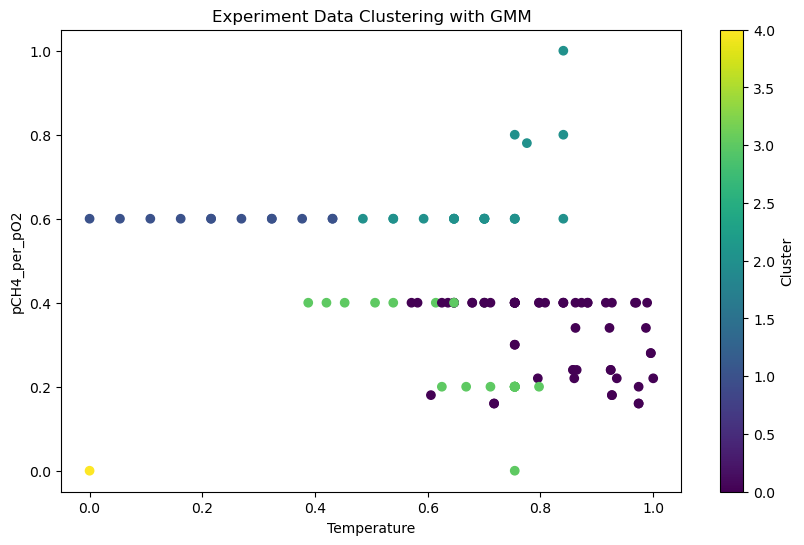

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
gmm.fit(scaled_features)

labels = gmm.predict(scaled_features)
scaled_experiment_data['Cluster'] = labels

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['Temperature'], scaled_experiment_data['pCH4_per_pO2'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('pCH4_per_pO2')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

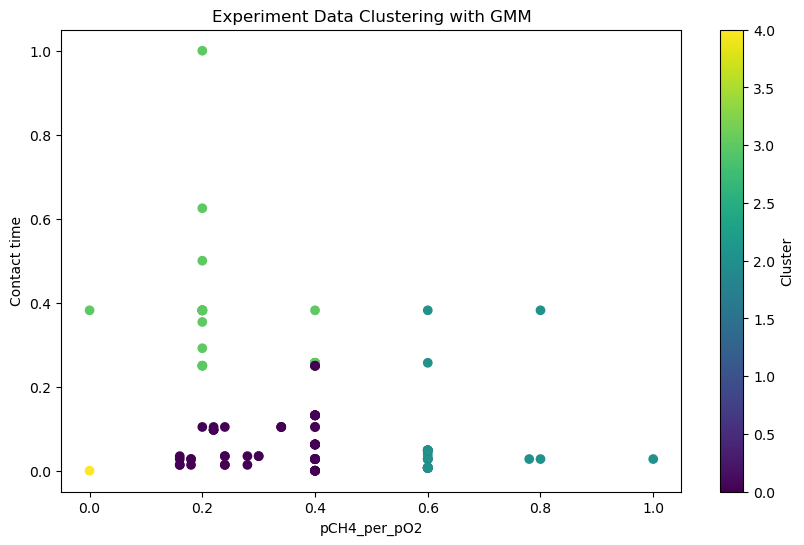

In [6]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['pCH4_per_pO2'], scaled_experiment_data['Contact time'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('pCH4_per_pO2')
plt.ylabel('Contact time')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

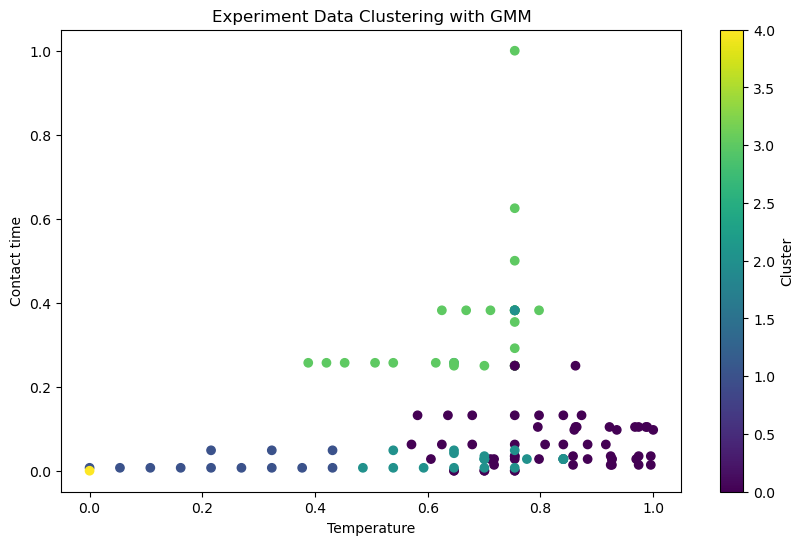

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['Temperature'], scaled_experiment_data['Contact time'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Contact time')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
scaled_experiment_data_0 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 0]
scaled_experiment_data_1 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 1]
scaled_experiment_data_2 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 2]
scaled_experiment_data_3 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 3]
scaled_experiment_data_4 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 4]
scaled_experiment_data_5 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 5]
scaled_experiment_data_6 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 6]

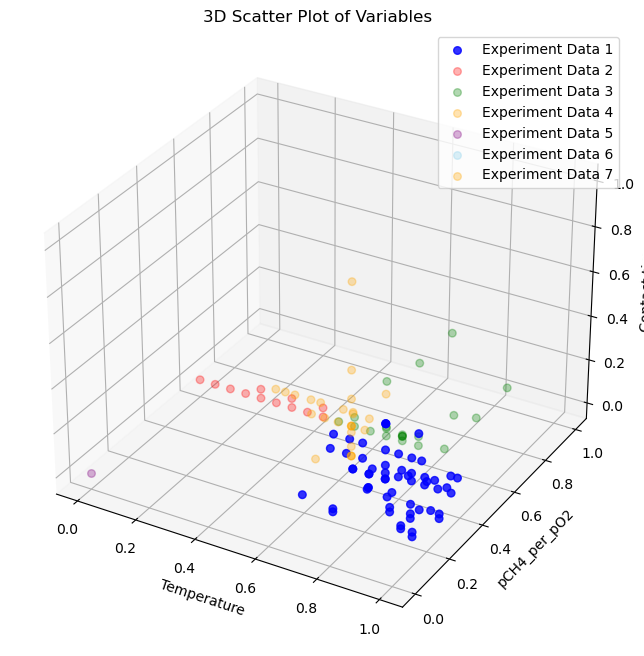

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the interpolation data with lower transparency
ax.scatter(scaled_experiment_data_0['Temperature'], scaled_experiment_data_0['pCH4_per_pO2'], scaled_experiment_data_0['Contact time'], 
           color='blue', label='Experiment Data 1', s=30, alpha=0.8)

# Plotting the extrapolation data with higher transparency
ax.scatter(scaled_experiment_data_1['Temperature'], scaled_experiment_data_1['pCH4_per_pO2'], scaled_experiment_data_1['Contact time'], 
           color='red', label='Experiment Data 2', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_2['Temperature'], scaled_experiment_data_2['pCH4_per_pO2'], scaled_experiment_data_2['Contact time'],
              color='green', label='Experiment Data 3', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_3['Temperature'], scaled_experiment_data_3['pCH4_per_pO2'], scaled_experiment_data_3['Contact time'],
              color='orange', label='Experiment Data 4', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_4['Temperature'], scaled_experiment_data_4['pCH4_per_pO2'], scaled_experiment_data_4['Contact time'],
                color='purple', label='Experiment Data 5', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_5['Temperature'], scaled_experiment_data_5['pCH4_per_pO2'], scaled_experiment_data_4['Contact time'],
                color='skyblue', label='Experiment Data 6', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_6['Temperature'], scaled_experiment_data_6['pCH4_per_pO2'], scaled_experiment_data_4['Contact time'],
                color='orange', label='Experiment Data 7', s=30, alpha=0.3)



# Setting labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('pCH4_per_pO2')
ax.set_zlabel('Contact time')
ax.set_title('3D Scatter Plot of Variables')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

In [11]:
import plotly.graph_objects as go

# Assuming 'scaled_experiment_data_0' and 'scaled_experiment_data_1' are your datasets
# Replace these variable names with your actual DataFrame names
# Ensure these DataFrames have 'Temperature', 'pCH4_per_pO2', and 'Contact time' columns

fig = go.Figure()

# Adding the experiment data 1 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_0['Temperature'],
    y=scaled_experiment_data_0['pCH4_per_pO2'],
    z=scaled_experiment_data_0['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,  # lower opacity
        color='blue'
    ),
    name='Experiment Data 1'
))

# Adding the experiment data 2 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_1['Temperature'],
    y=scaled_experiment_data_1['pCH4_per_pO2'],
    z=scaled_experiment_data_1['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='red'
    ),
    name='Experiment Data 2'
))

# Adding the experiment data 3 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_2['Temperature'],
    y=scaled_experiment_data_2['pCH4_per_pO2'],
    z=scaled_experiment_data_2['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='green'
    ),
    name='Experiment Data 3'
))

# Adding the experiment data 4 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_3['Temperature'],
    y=scaled_experiment_data_3['pCH4_per_pO2'],
    z=scaled_experiment_data_3['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='orange'
    ),
    name='Experiment Data 4'
))

# Adding the experiment data 5 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_4['Temperature'],
    y=scaled_experiment_data_4['pCH4_per_pO2'],
    z=scaled_experiment_data_4['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='purple'
    ),
    name='Experiment Data 5'
))

# Adding the experiment data 5 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_5['Temperature'],
    y=scaled_experiment_data_5['pCH4_per_pO2'],
    z=scaled_experiment_data_5['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='sky blue'
    ),
    name='Experiment Data 5'
))

# Setting the layout for the 3D plot
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='Temperature',
        yaxis_title='pCH4_per_pO2',
        zaxis_title='Contact time'
    ),
    title='3D Scatter Plot of Variables'
)

fig.show()

In [13]:
scaled_experiment_data_2.count()

Temperature        21
pCH4_per_pO2       21
Contact time       21
Y(C2)_predicted    21
Cluster            21
dtype: int64

In [14]:
scaled_experiment_data_2 = scaled_experiment_data_2.drop(['Cluster'], axis=1)

experiment_data_2 = scaler.inverse_transform(scaled_experiment_data_2)

experiment_data_2 = pd.DataFrame(experiment_data_2, columns=scaled_experiment_data_2.columns)

experiment_data_2

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted
0,1083.0,4.9,0.04,12.047283
1,1023.0,4.0,0.06,7.919782
2,1073.0,4.0,0.55,14.661379
3,1073.0,5.0,0.55,13.831947
4,1023.0,4.0,0.37,7.904139
5,1113.0,4.0,0.04,13.370256
6,1113.0,5.0,0.04,12.560559
7,1113.0,6.0,0.04,12.560559
8,1048.0,4.0,0.05,11.712999
9,1048.0,4.0,0.04,7.424316


In [15]:
min_values = experiment_data_2[['Temperature', 'pCH4_per_pO2', 'Contact time']].min()
max_values = experiment_data_2[['Temperature', 'pCH4_per_pO2', 'Contact time']].max()

In [16]:
def classify_data(row, min_values, max_values):
    conditions = [
        row['Temperature'] >= min_values['Temperature'] and row['Temperature'] <= max_values['Temperature'],
        row['pCH4_per_pO2'] >= min_values['pCH4_per_pO2'] and row['pCH4_per_pO2'] <= max_values['pCH4_per_pO2'],
        row['Contact time'] >= min_values['Contact time'] and row['Contact time'] <= max_values['Contact time']
    ]
    return 'interpolation' if all(conditions) else 'extrapolation'

data['Classification'] = data.apply(classify_data, axis=1, args=(min_values, max_values))

data

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted,Classification
0,1092.0,2.1,0.150,16.146929,extrapolation
1,1124.0,2.2,0.150,17.852878,extrapolation
2,1175.0,2.0,0.150,23.288527,extrapolation
3,1123.0,2.7,0.150,17.690870,extrapolation
4,1151.0,2.7,0.150,20.950115,extrapolation
...,...,...,...,...,...
9373,1187.0,6.0,1.152,20.409223,extrapolation
9374,1187.0,6.0,1.224,20.409223,extrapolation
9375,1187.0,6.0,1.296,20.409223,extrapolation
9376,1187.0,6.0,1.368,20.409223,extrapolation


In [17]:
interpolation_data = data[data['Classification'] == 'interpolation']
extrapolation_data = data[data['Classification'] == 'extrapolation']

print("Interpolation Data Count:", len(interpolation_data))
print("Extrapolation Data Count:", len(extrapolation_data))

Interpolation Data Count: 462
Extrapolation Data Count: 8916


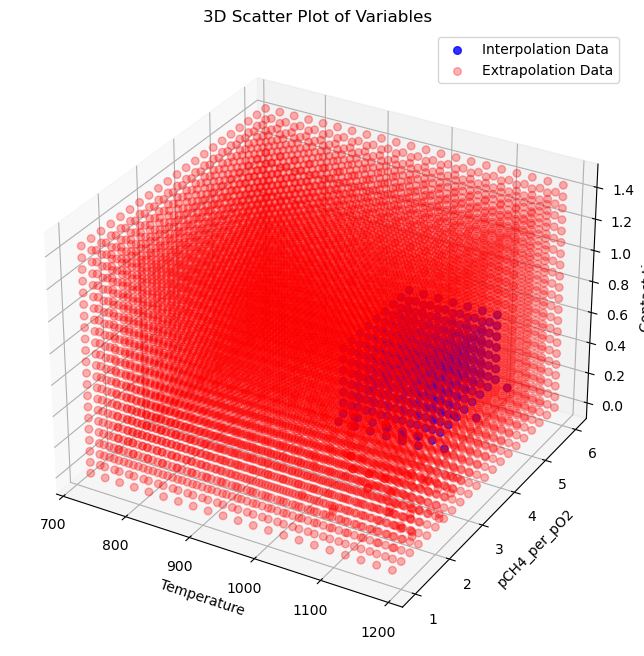

In [18]:
# %%
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the interpolation data with lower transparency
ax.scatter(interpolation_data['Temperature'], interpolation_data['pCH4_per_pO2'], interpolation_data['Contact time'], 
           color='blue', label='Interpolation Data', s=30, alpha=0.8)

# Plotting the extrapolation data with higher transparency
ax.scatter(extrapolation_data['Temperature'], extrapolation_data['pCH4_per_pO2'], extrapolation_data['Contact time'], 
           color='red', label='Extrapolation Data', s=30, alpha=0.3)

# Setting labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('pCH4_per_pO2')
ax.set_zlabel('Contact time')
ax.set_title('3D Scatter Plot of Variables')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

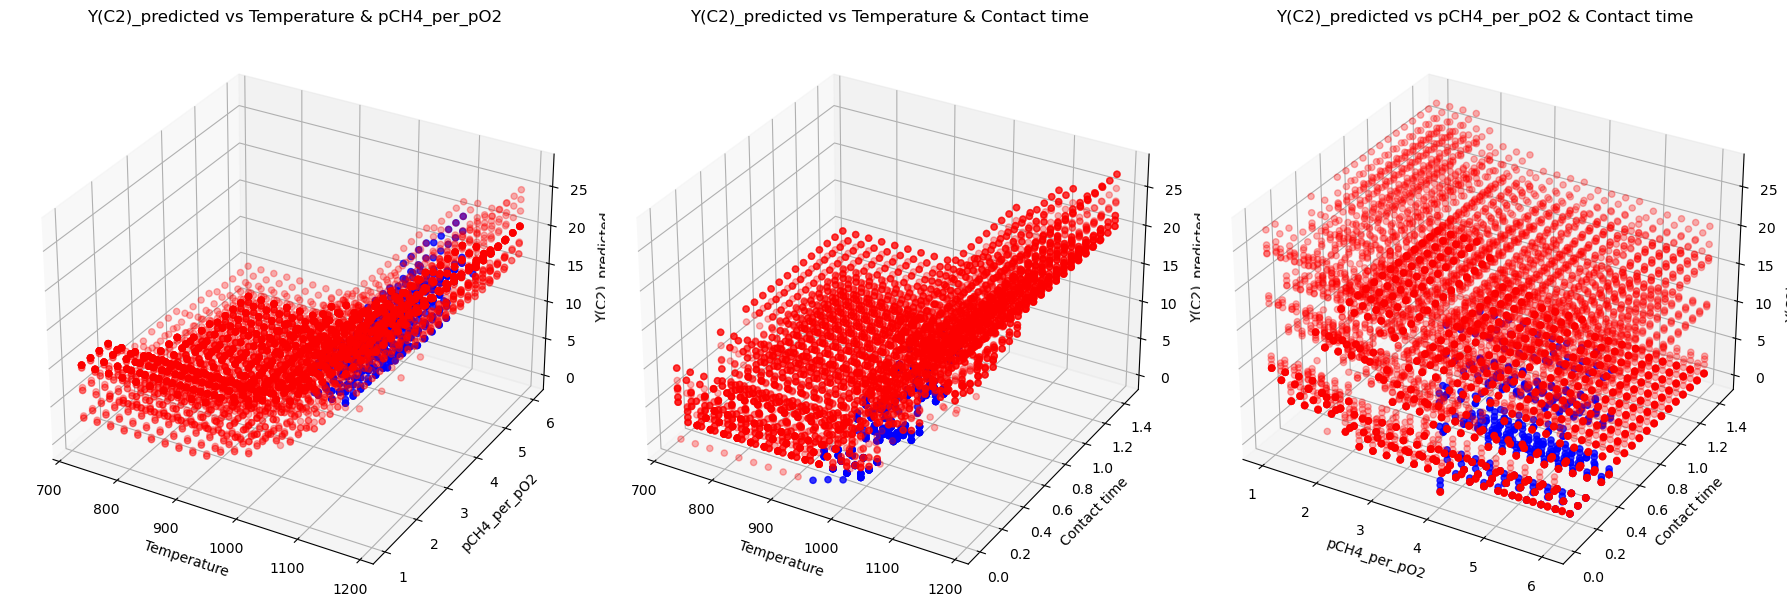

In [19]:
# Creating 3D scatter plots
fig = plt.figure(figsize=(18, 6))

# Y(C2)_predicted vs Temperature and pCH4_per_pO2
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(interpolation_data['Temperature'], interpolation_data['pCH4_per_pO2'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax1.scatter(extrapolation_data['Temperature'], extrapolation_data['pCH4_per_pO2'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('pCH4_per_pO2')
ax1.set_zlabel('Y(C2)_predicted')
ax1.set_title('Y(C2)_predicted vs Temperature & pCH4_per_pO2')

# Y(C2)_predicted vs Temperature and Contact time
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(interpolation_data['Temperature'], interpolation_data['Contact time'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax2.scatter(extrapolation_data['Temperature'], extrapolation_data['Contact time'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Contact time')
ax2.set_zlabel('Y(C2)_predicted')
ax2.set_title('Y(C2)_predicted vs Temperature & Contact time')

# Y(C2)_predicted vs pCH4_per_pO2 and Contact time
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(interpolation_data['pCH4_per_pO2'], interpolation_data['Contact time'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax3.scatter(extrapolation_data['pCH4_per_pO2'], extrapolation_data['Contact time'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax3.set_xlabel('pCH4_per_pO2')
ax3.set_ylabel('Contact time')
ax3.set_zlabel('Y(C2)_predicted')
ax3.set_title('Y(C2)_predicted vs pCH4_per_pO2 & Contact time')

plt.tight_layout()
plt.show()

In [20]:
interpolation_data

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted,Classification
18,1083.0,4.9,0.040,12.047283,interpolation
21,1023.0,4.0,0.060,7.919782,interpolation
31,1073.0,4.0,0.550,14.661379,interpolation
32,1073.0,5.0,0.550,13.831947,interpolation
43,1023.0,4.0,0.370,7.904139,interpolation
...,...,...,...,...,...
7596,1094.2,6.0,0.216,12.000963,interpolation
7597,1094.2,6.0,0.288,12.000963,interpolation
7598,1094.2,6.0,0.360,17.788638,interpolation
7599,1094.2,6.0,0.432,13.592406,interpolation


In [21]:
interpolation_data.drop(['Classification'], axis=1, inplace=True)
extrapolation_data.drop(['Classification'], axis=1, inplace=True)

interpolation_data.to_csv(r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_train_rev.csv', index=False)
extrapolation_data.to_csv(r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_test_rev.csv', index=False)

C:\Users\OJH\AppData\Local\Temp\ipykernel_49424\3417733382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OJH\AppData\Local\Temp\ipykernel_49424\3417733382.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

